## Tarea 2
### Santiago Tabares Garcés

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)

In [54]:
sns.set(rc={"figure.figsize":(10,8)})

Text(0.5, 1.0, 'Datos')

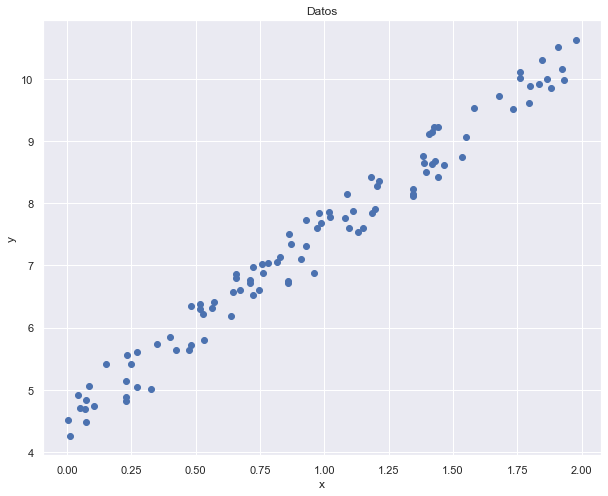

In [55]:
plt.plot(x,y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos")

Vemos que hay una dispersión aleatoria de los datos, debida al error agregado a propósito.

#### Vamos a hacer un modelo para ajustar los datos.
#### Escogemos un modelo de Regresión Lineal.
Usemos las herramientas de Sklearn

In [56]:
def train(x,y):
    linear_regression = LinearRegression() #Instancia de la clase LinearRegression()
    # ahora entrenamos el modelo
    model = linear_regression.fit(x,y)
    return model

model = train(x,y)

In [57]:
model.score(x,y)

0.9753172853208707

In [50]:
m = model.coef_
b = model.intercept_
print("Parámetros del modelo: " , m , " ", b)

Parámetros del modelo:  [[2.98611662]]   [4.53979644]


In [58]:
y1 = m*x + b

Text(0.5, 1.0, 'Ajuste usando Regresion lineal')

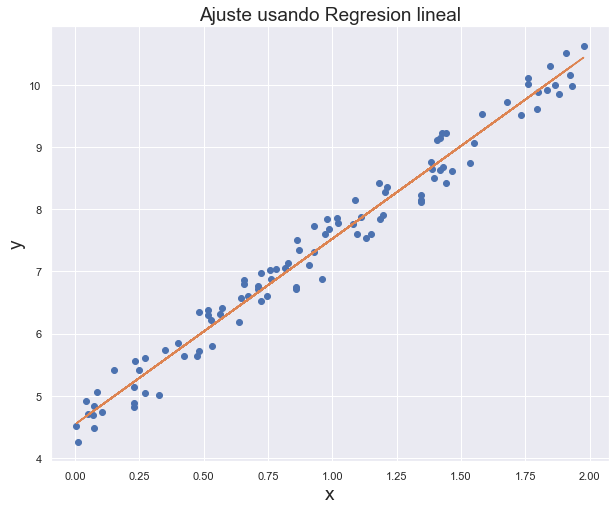

In [59]:
plt.plot(x,y, "o")
plt.plot(x,y1)
plt.xlabel("x", fontsize = 19)
plt.ylabel("y", fontsize = 19)
plt.title("Ajuste usando Regresion lineal", fontsize = 19)

### Ahora entrenemos 1000 instancias del modelo. Usando la misma función lineal anterior

In [62]:
#Parametros
M = []
B = []

# Cada iteracion se crea un nuevo conjunto de numeros aleatorios
for i in range(1000):
    x = 2 * np.random.rand(100,1)
    y = 4 + 3 * x + np.random.rand(100,1)
    model = train(x,y) #Entrenamos el modelo
    M.append(model.coef_)
    B.append(model.intercept_)
    

In [63]:
# Promedio de M
M_prom = (sum(M)/len(M))

# Promedio de B
B_prom = (sum(B)/len(B))
print("El promedio de las pendientes M es: ", M_prom)
print("El promedio de los interceptos B es: ", B_prom)

El promedio de las pendientes M es:  [[2.99802799]]
El promedio de los interceptos B es:  [4.50215364]


El promedio de las pendientes es muy cerca a 3, lo que tiene sentido debido a que de la función que partimos es:

$y = 4 + 3 * x + np.random.rand(100,1)$

Con lo que el promedio de la pendiente como no se altera mucho, se espera esté muy muy cerca a 3.

A diferencia del promedio del intercepto, ya que en esta funcion el intercepto está dado por: 

$4 + np.random.rand(100,1)$

Y como **np.random.rand(100,1)** genera números aleatorios de 0 a 1, el promedio de este debería ser aproximadamente $4.5$, lo cual podemmos ver que se refleja en el valor obtenido.


In [108]:
# Desviacion estandar

# Para las pendientes
desv2 = 1/(len(M))*(sum((M-M_prom)**2))
desv = np.sqrt(desv2)

# Para los interceptos
desv2_b = 1/(len(M))*(sum((B-B_prom)**2))
desv_b = np.sqrt(desv2_b)

print("La desviaciones estandar son.")
print("Para las pendientes: ", desv)
print("Para los interceptos: ", desv_b)

La desviaciones estandar son.
Para las pendientes:  [[0.0515007]]
Para los interceptos:  [0.0596137]


Se puede notar que la desviación estándar para ambos parámetros es muy similar, esto debido a que esta desviación es debida principalmente a la función **np.random.rand(100,1)** crea valores aleatorios de una distribución normal. 

## Histogramas

/home/tabares/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

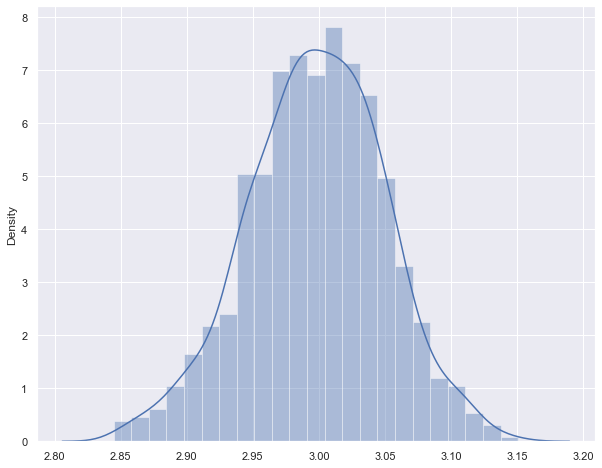

In [111]:
# Histograma para las pendientes
sns.distplot(M)

/home/tabares/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

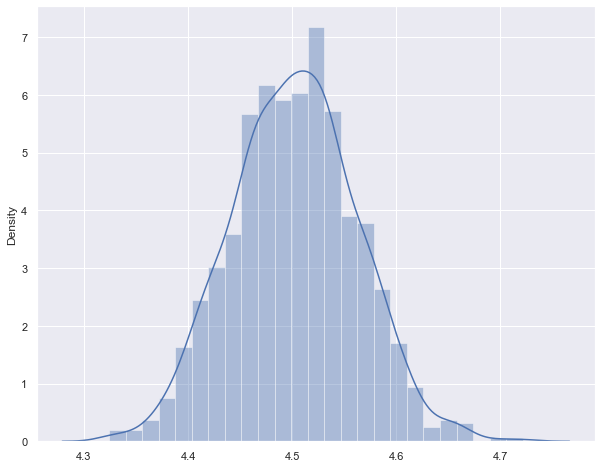

In [112]:
# Histograma para los interceptos
sns.distplot(B)

Podemos notar en ambos casos, que se tiene una distribución normal. Cuyo pico debe estar unicado en el valor promedio de cada parámetro. Y la desviación estándar cumple la tarea del parámetro $\sigma$ en una distribución normal que es el rango donde están el $68%$ de los datos, y el $95%$ alrededor de $2\sigma$.

Esto era de esperar debido a lo discutido anteriormente que la función que genera números aleatorios, lo hace desde una distribución normal.

## Diagramas de cajas

<AxesSubplot:>

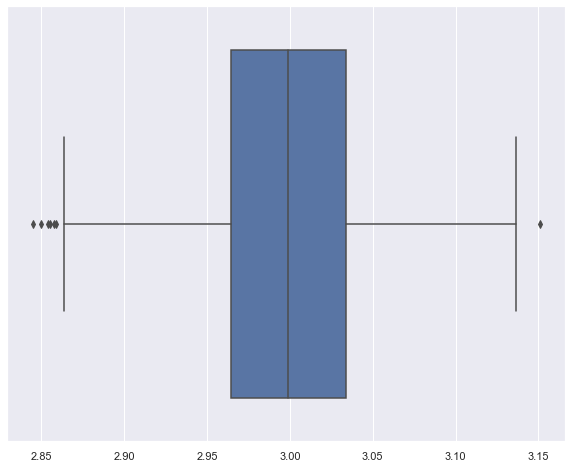

In [131]:
# Para las pendientes M
sns.boxplot(x=np.array(M))

<AxesSubplot:>

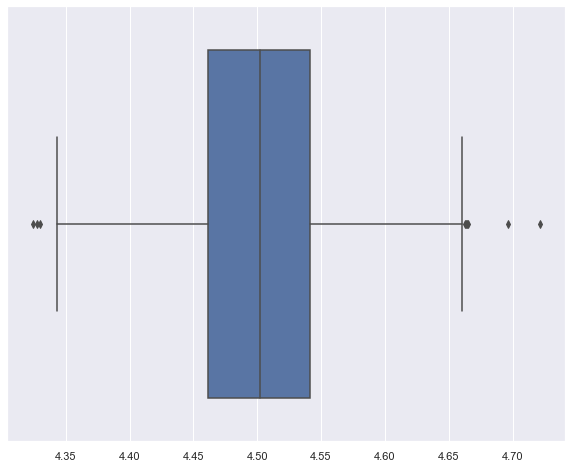

In [133]:
# Para los interceptos B
sns.boxplot(x=np.array(B))

Nuevamente en estos diagramas de cajas se nota la distribución normal de los datos.
Donde la gran mayoría de los datos están dentro del rango de $2\sigma$, pero hay algunos datos fuera de este rango debido al caracter aleatorio de la función np.random.rand().

En conclusión, debido a que los datos aleatorios se general provenientes de una distribución normal, al realizar este análisis estadístico, se reitera este comportamiento mediante varias maneras.